# Workshop 2: Classification


To build a proper machine learning model we need clean data. However, almost all the datasets are dirty due to noise, outliers. It is also important to know the data to use the appropriate machine learning algorithm. Thus, in this exercise, we will try to explore the data, clean the data, find insights, and finally apply machine learning models.

There are so many data cleaning techniques, however, we will only focus on the most basic operations
There are some questions prepared for you to answer. Please double click on those cells and answer them.
Check out this [video](https://www.youtube.com/watch?v=HW29067qVWk) (From 4:30 seconds) to learn how to use Jupyter Notebook more efficiently.

You can also use google colab as well. It is a free online platform provided by Google to execute ipynb files. You don't have to install anything in your local machine. You just need an internet connection and you are ready to go. A short youtube survey will help you to understand all the basic
usage of **Google Colab**.


# Part - 1

### Titanic Dataset
Some notes for the dataset.
**Feature Names**
**pclass**: A proxy for socio-economic status (SES)1 = Upper2 = Middle3 = Lower
**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5**sibsp**: The dataset defines family relations in this way __Sibling__ and __Spouse__.**parch**: The dataset defines family relations in this way... Parent and Child. Some children travelled only with a nanny, therefore parch=0 for them.
Our Task is to explore the data, clean it properly to feed in the machine learning model and finally predict if a passenger has survived or not, utilizing the best predictive model.
#### Contents:1. Read In and Explore the Data2. Data Analysis3. Data Visualization4. Cleaning Data5. Train Machine Learning Models6. Choosing the Best Model

## 1) Import Necessary Libraries
The first thing you have to do is to import necessary modules.

In [53]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2) Read in and Explore the Data 
It's time to read in our training and testing data using `pd.read_csv`

In [54]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 3) Data Analysis
We will try to observe some key insights of the data. Answer the following questions:

**Q.** What is difference between .head() and .sample() function ? Hint: Check Pandas Documentation

**Q.** There are a total of 714 values for Age feature in the training set. What is the percentage of missing values in Age column?

**Q.** What is the percentage of missing values in the Cabin feature? Note: If the percentage of the missing value for the Cabin is high, it would be hard to fill in the missing values. Thus, drop the column may be a good idea.


In [55]:
# Add your code here


Add your explanation here:


### Few Hypothesis (Initial Assumption):
* Sex: Females are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.

## 4) Data Visualization
To see if our hypothesis is correct or not, we have to visualize the data

### Sex Feature
This one is done for you.

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


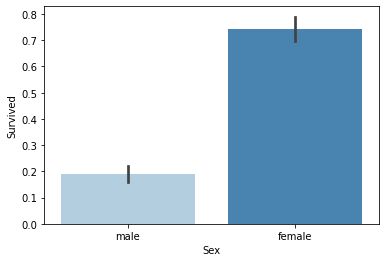

In [56]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train, palette = "Blues")

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Our first hypothesis seems correct. Females have a much higher chance of survival than males.

### Pclass Feature

In [57]:
# Add your code here


Add your explanation here:


### SibSp Feature

In [58]:
# Add your code here


Add your explanation here:


### Parch Feature

In [59]:
# Add your code here


Add your explanation here:


### Age Feature

In [60]:
# Add your code here


Add your explanation here:


# Part - 2

## 5) Cleaning Data
It's time to clean the missing values and unnecessary information!

### Looking at the Test Data
Let's see how our test data looks!

In [61]:
test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* We have a total of 418 passengers.
* 1 value from the Fare feature is missing.
* Around 20.5% of the Age feature is missing, we will need to fill that in.

### Cabin Feature

In [62]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature
we can also drop the Ticket feature since it's unlikely to yield any useful information.

In [63]:
# Add your code here.


### Embarked Feature
Now we need to fill in the missing values in the Embarked feature.

HINT: It's a good practice to fill in the missing values with the most occurances when the number of missing values are few. But it differs depending on the situation. So, lets replace the missing embarked values with **"S"**, for instance, if the majority of people embarked in Southampton (S). (First find the most frequent one).

In [64]:
# Add your code here


### Age Feature

A higher percentage of values are missing for the age feature. However, it would be illogical to fill all of them with the same value. Instead, we'll try to find a way to predict the missing ages.

In [65]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
# As the unique values of the Title column are a bit larger than expected, we will replace those with more common terms.
# Replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [67]:
# As machine learning model understand numeric values, thus we need to define numerical values for categorical variables.
# Map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Next, we'll try to predict the missing Age values from the most common age for their Title.

In [69]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I've put down a less elegant, temporary solution for now. But it's fine for this exercise
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now that we've filled in the missing values at least somewhat accurately, it's time to map each age group to a numerical value.

In [ ]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Name Feature
We can drop the name feature because we've extracted the titles.

In [ ]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex Feature

In [ ]:
# Map each Sex value to a numerical value


### Embarked Feature

In [ ]:
# Map each Embarked value to a numerical value


### Fare Feature
It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [ ]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [ ]:
#check train data
train.head()

In [ ]:
#check test data
test.head()

**Q:** What differences you are observing here from the initial dataset?

**Q:** Write some other ways to change categoriacal variables into numerical ones? (*Hint:* Check scikit-learn preprocessing and encoding documentations)



## 6) Choosing the Best Model

### Splitting the Training Data
We will use split of our training data into training and validation set to test the accuracy of different models. Please check [here](https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830#:~:text=The%20simplest%20way%20to%20split,the%20performance%20of%20our%20model.) to know more about the reason behind splitting the data 

In [ ]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

### Testing Different Models
Try to test the following models with the training data

* Support Vector Machines
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors

For each model, set the model, fit it with 80% of the training data, predict for 20% of the training data and check the accuracy.

In [ ]:
# Add your code here.


**Q:** Compare all the above models and draw a conclusion which model should we use and why!